# [[5,1,2]] lattice code

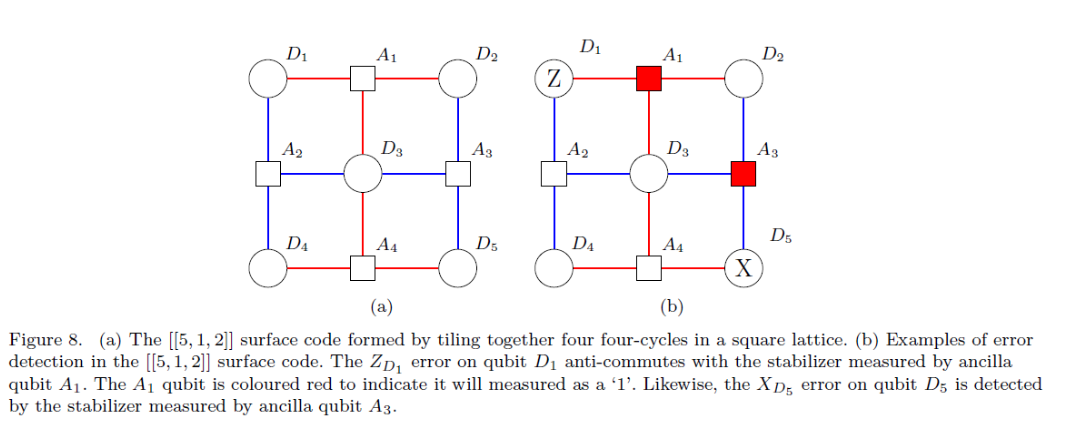

In [2]:
import stim

In [3]:
def synd_x(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    size = len(qubits)
    q = range(n_qubits + 1)
    if size > 2:
        for i_q in range(size - 1):
            qc.append_operation('CX',[q[qubits[size - 1]], q[qubits[i_q]]])
    else:
        qc.append_operation('CX',[q[qubits[size - 1]], q[qubits[0]]])
    return qc

def synd_z(qubits):
    qc = stim.Circuit()
    n_qubits = max(qubits)
    size = len(qubits)
    q = range(n_qubits + 1)
    if size > 2:
        for i_q in range(size - 1):
            qc.append_operation('CZ',[q[qubits[size - 1]], q[qubits[i_q]]])
    else:
        qc.append_operation('CZ',[q[qubits[size - 1]], q[qubits[0]]])
    return qc


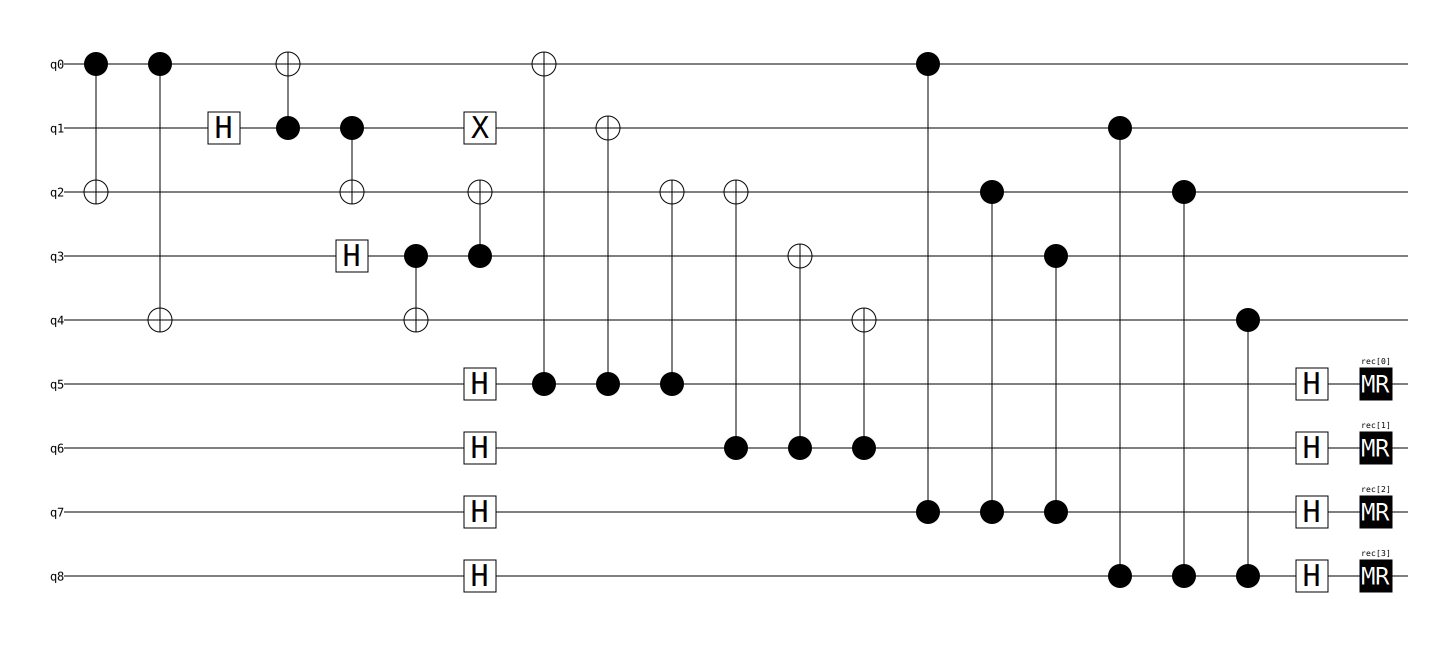

In [7]:
qc_512 = stim.Circuit()

#Information encoder
qc_512.append_operation('CX',[0, 2])
qc_512.append_operation('CX',[0, 4])
qc_512.append_operation('H',[1])
qc_512.append_operation('CX',[1, 0])
qc_512.append_operation('CX',[1, 2])
qc_512.append_operation('H',[3])
qc_512.append_operation('CX',[3, 4])
qc_512.append_operation('CX',[3, 2])

#Error
qc_512.append_operation('X',[1])

#Syndrome extraction
qc_512.append_operation('H',[5, 6, 7, 8])
s1 = synd_x([0, 1, 2, 5])
qc_512 = qc_512 + s1
s1 = synd_x([2, 3, 4, 6])
qc_512 = qc_512 + s1
s1 = synd_z([0, 2, 3, 7])
qc_512 = qc_512 + s1
s1 = synd_z([1, 2, 4, 8])
qc_512 = qc_512 + s1
qc_512.append_operation('H',[5, 6, 7, 8])

qc_512.append_operation('MR', [5, 6, 7, 8])

qc_512.diagram('timeline-svg')

In [9]:
res = qc_512.compile_sampler().sample(1)
res

array([[False, False, False,  True]])

In [22]:
def qec_512(err, err_qubit):
    qc_512 = stim.Circuit()

    #state preparation
    qc_512.append_operation('H',[0])
    
    #Information encoder
    qc_512.append_operation('CX',[0, 2])
    qc_512.append_operation('CX',[0, 4])
    qc_512.append_operation('H',[1])
    qc_512.append_operation('CX',[1, 0])
    qc_512.append_operation('CX',[1, 2])
    qc_512.append_operation('H',[3])
    qc_512.append_operation('CX',[3, 4])
    qc_512.append_operation('CX',[3, 2])
    
    #Adding a single error
    qc_512.append_operation(err,[err_qubit])
    
    #Syndrome extraction
    qc_512.append_operation('H',[5, 6, 7, 8])
    s1 = synd_x([0, 1, 2, 5])
    qc_512 = qc_512 + s1
    s1 = synd_x([2, 3, 4, 6])
    qc_512 = qc_512 + s1
    s1 = synd_z([0, 2, 3, 7])
    qc_512 = qc_512 + s1
    s1 = synd_z([1, 2, 4, 8])
    qc_512 = qc_512 + s1
    qc_512.append_operation('H',[5, 6, 7, 8])
    
    qc_512.append_operation('MR', [5, 6, 7, 8])
    return qc_512
    


# Analizing how different errors are captured by the syndromes measurements

I try X and Z errors just before the syndromes block. One error at a time. But I try different qubits.

It seems that different errors may give the same syndrome. This is probably why one cannot correct for the erros in [[5,1,2]] code.

In [23]:
err = []
err.append('X')
err.append('Z')

for j in range(2):
    for i in range(5):
        qc = qec_512(err[j], i)
        res = qc.compile_sampler().sample(1)
        res_str = 'Error type: ' + err[j] + ', qubit: ' + str(i) + ', res :' + str(res)
        print(res_str)

Error type: X, qubit: 0, res :[[False False  True False]]
Error type: X, qubit: 1, res :[[False False False  True]]
Error type: X, qubit: 2, res :[[False False  True  True]]
Error type: X, qubit: 3, res :[[False False  True False]]
Error type: X, qubit: 4, res :[[False False False  True]]
Error type: Z, qubit: 0, res :[[ True False False False]]
Error type: Z, qubit: 1, res :[[ True False False False]]
Error type: Z, qubit: 2, res :[[ True  True False False]]
Error type: Z, qubit: 3, res :[[False  True False False]]
Error type: Z, qubit: 4, res :[[False  True False False]]
